In [1]:
import pandas as pd

# Load the dataset
file_path = r"D:\DS_mini\tweets\data_science.csv"
df = pd.read_csv(file_path)

# Print the initial shape of the dataframe
print("Initial shape of the dataframe:", df.shape)

# Identify null values
print("\nNull values in each column:")
print(df.isnull().sum())

# Remove rows with any null values
df_cleaned = df.dropna()

# Print the shape of the dataframe after removing null values
print("\nShape of the dataframe after removing null values:", df_cleaned.shape)

# Display the first few rows of the cleaned dataframe
print("\nFirst few rows of the cleaned dataframe:")
print(df_cleaned.head())

C:\Users\aakan\AppData\Local\Temp\ipykernel_6120\1855392692.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Initial shape of the dataframe: (241386, 36)

Null values in each column:
id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                    0
place              241032
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet                 0
quote_url          231065
video                   0
thumbnail          131048
near               241386
geo                241386
source             241386
user_rt_id         241386
user_rt            241386
retweet_id         241386
reply_to                0
retweet_date       241386
translate          241386
trans_src          241386
trans_dest      

In [2]:
# Reload the dataset to start fresh
df = pd.read_csv(file_path)

# Print the initial shape again to confirm
print("Initial shape of the dataframe:", df.shape)

# Check nulls in the 'tweet' column
print("\nNull values in 'tweet' column:", df['tweet'].isnull().sum())

# Remove rows where the 'tweet' column is null (if any)
df_cleaned = df.dropna(subset=['tweet'])

# Print the shape after handling nulls in 'tweet'
print("\nShape after removing rows with null 'tweet':", df_cleaned.shape)

# Identify columns with a very high percentage of missing values (e.g., > 90%)
null_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
cols_to_drop = null_percentage[null_percentage > 90].index.tolist()

# Drop these highly null columns
df_cleaned = df_cleaned.drop(columns=cols_to_drop)

# Print the shape after dropping high-null columns
print("\nShape after dropping columns with > 90% nulls:", df_cleaned.shape)

# Display the first few rows of the further cleaned dataframe
print("\nFirst few rows of the further cleaned dataframe:")
print(df_cleaned.head())

# Summarize the remaining columns and their data types
print("\nSummary of remaining columns and their data types:")
print(df_cleaned.info())

C:\Users\aakan\AppData\Local\Temp\ipykernel_6120\2448074904.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Initial shape of the dataframe: (241386, 36)

Null values in 'tweet' column: 0

Shape after removing rows with null 'tweet': (241386, 36)

Shape after dropping columns with > 90% nulls: (241386, 24)

First few rows of the further cleaned dataframe:
                    id      conversation_id               created_at  \
0  1406400408545804288  1406400396264943616  2021-06-20 05:26:01 IST   
1  1406390341176016897  1406390341176016897  2021-06-20 04:46:01 IST   
2  1406386311481774083  1406386311481774083  2021-06-20 04:30:00 IST   
3  1406383545153638402  1406383545153638402  2021-06-20 04:19:01 IST   
4  1406358632648818689  1406358632648818689  2021-06-20 02:40:01 IST   

         date      time  timezone              user_id         username  \
0  2021-06-20  05:26:01       530  1113747629282930688  ballouxfrancois   
1  2021-06-20  04:46:01       530   788898706586275840     tdatascience   
2  2021-06-20  04:30:00       530             19402238      sciencenews   
3  2021-06-20  04:

In [3]:
# Identify categorical columns (those with 'object' dtype)
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

# Let's look at the unique values in some of these columns, especially 'language'
print("\nUnique values in 'language' column:", df_cleaned['language'].unique())

# You can explore other categorical columns if you think they might be relevant
# For example:
# print("\nUnique values in 'username' column (first 20):", df_cleaned['username'].unique()[:20])

Categorical columns: ['created_at', 'date', 'time', 'username', 'name', 'tweet', 'language', 'mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'link', 'thumbnail', 'reply_to']

Unique values in 'language' column: ['en' 'und' 'es' 'fr' 'lt' 'in' 'et' 'pt' 'tl' 'de' 'it' 'da' 'ro' 'pl'
 'ca' 'nl' 'ja' 'te' 'ar' 'ta' 'ru' 'hi' 'tr' 'uk' 'th' 'cs' 'fi' 'bn'
 'no' 'iw' 'sv' 'kn' 'zh' 'ht' 'mr' 'ko' 'el' 'cy' 'fa' 'hy' 'ml' 'hu'
 'sl' 'eu' 'vi' 'gu' 'is' 'sr' 'lv']


In [4]:
# Filter the DataFrame to include only English tweets
df_en = df_cleaned[df_cleaned['language'] == 'en'].copy()

# Print the shape of the DataFrame after filtering by language
print("Shape of the DataFrame after filtering for English tweets:", df_en.shape)

# Display the first few rows of the English tweets DataFrame
print("\nFirst few rows of English tweets:")
print(df_en[['tweet']].head())

# Update our list of categorical columns to reflect the filtered DataFrame
categorical_cols_en = df_en.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns in the English tweets DataFrame:", categorical_cols_en)

Shape of the DataFrame after filtering for English tweets: (230255, 24)

First few rows of English tweets:
                                               tweet
0  What can be done?  - Never blindly trust an ab...
1  "We need a paradigm shift from model-centric t...
2  Using high-resolution satellite data and compu...
3  .@Stephenson_Data shares four steps that will ...
4  "Curricula is inherently brittle in a world wh...

Categorical columns in the English tweets DataFrame: ['created_at', 'date', 'time', 'username', 'name', 'tweet', 'language', 'mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'link', 'thumbnail', 'reply_to']


In [5]:
# Summarize the data types of the columns
print("Data types of columns in the English tweets DataFrame:")
print(df_en.dtypes)

# Further summarize the types of variables
categorical_cols_en = df_en.select_dtypes(include='object').columns.tolist()
numerical_cols_en = df_en.select_dtypes(include=['int64', 'float64']).columns.tolist()
boolean_cols_en = df_en.select_dtypes(include='bool').columns.tolist()

print("\nCategorical columns:", categorical_cols_en)
print("Numerical columns:", numerical_cols_en)
print("Boolean columns:", boolean_cols_en)

Data types of columns in the English tweets DataFrame:
id                  int64
conversation_id     int64
created_at         object
date               object
time               object
timezone            int64
user_id             int64
username           object
name               object
tweet              object
language           object
mentions           object
urls               object
photos             object
replies_count       int64
retweets_count      int64
likes_count         int64
hashtags           object
cashtags           object
link               object
retweet              bool
video               int64
thumbnail          object
reply_to           object
dtype: object

Categorical columns: ['created_at', 'date', 'time', 'username', 'name', 'tweet', 'language', 'mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'link', 'thumbnail', 'reply_to']
Numerical columns: ['id', 'conversation_id', 'timezone', 'user_id', 'replies_count', 'retweets_count', 'likes_count', 'video']

In [6]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers from 'replies_count'
df_no_outliers_replies = remove_outliers_iqr(df_en, 'replies_count')
print(f"Shape after removing 'replies_count' outliers: {df_no_outliers_replies.shape}")

# Remove outliers from 'retweets_count' based on the previous result
df_no_outliers_retweets = remove_outliers_iqr(df_no_outliers_replies, 'retweets_count')
print(f"Shape after removing 'retweets_count' outliers: {df_no_outliers_retweets.shape}")

# Remove outliers from 'likes_count' based on the previous result
df_en_processed = remove_outliers_iqr(df_no_outliers_retweets, 'likes_count')
print(f"Shape after removing 'likes_count' outliers: {df_en_processed.shape}")

print("\nShape of the DataFrame after outlier removal:", df_en_processed.shape)

# Display descriptive statistics of the engagement metrics after outlier removal
print("\nDescriptive statistics of engagement metrics after outlier removal:")
print(df_en_processed[['replies_count', 'retweets_count', 'likes_count']].describe())

Shape after removing 'replies_count' outliers: (177795, 24)
Shape after removing 'retweets_count' outliers: (161823, 24)
Shape after removing 'likes_count' outliers: (153449, 24)

Shape of the DataFrame after outlier removal: (153449, 24)

Descriptive statistics of engagement metrics after outlier removal:
       replies_count  retweets_count    likes_count
count       153449.0   153449.000000  153449.000000
mean             0.0        3.116136       3.808946
std              0.0        3.601494       3.944095
min              0.0        0.000000       0.000000
25%              0.0        0.000000       1.000000
50%              0.0        2.000000       2.000000
75%              0.0        5.000000       6.000000
max              0.0       16.000000      16.000000


C:\Users\aakan\AppData\Local\Temp\ipykernel_6120\2125323684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en_processed['tweet_length'] = df_en_processed['tweet'].apply(len)


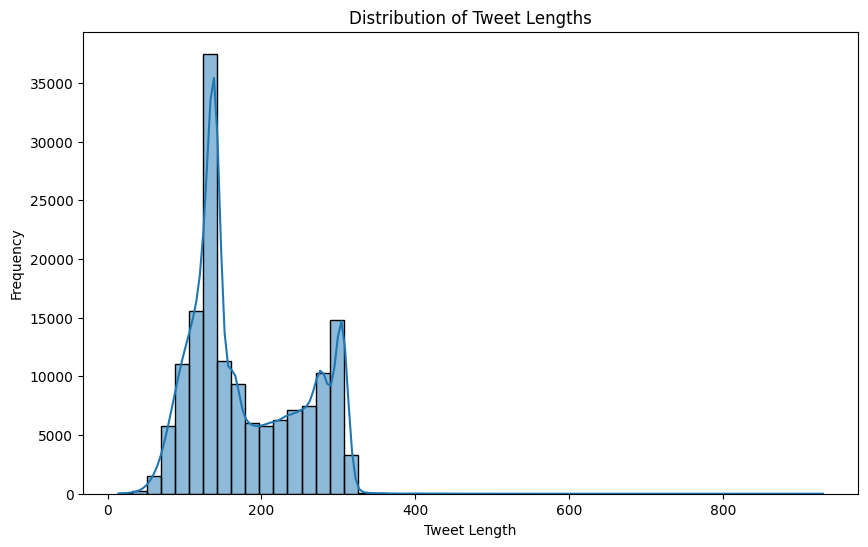

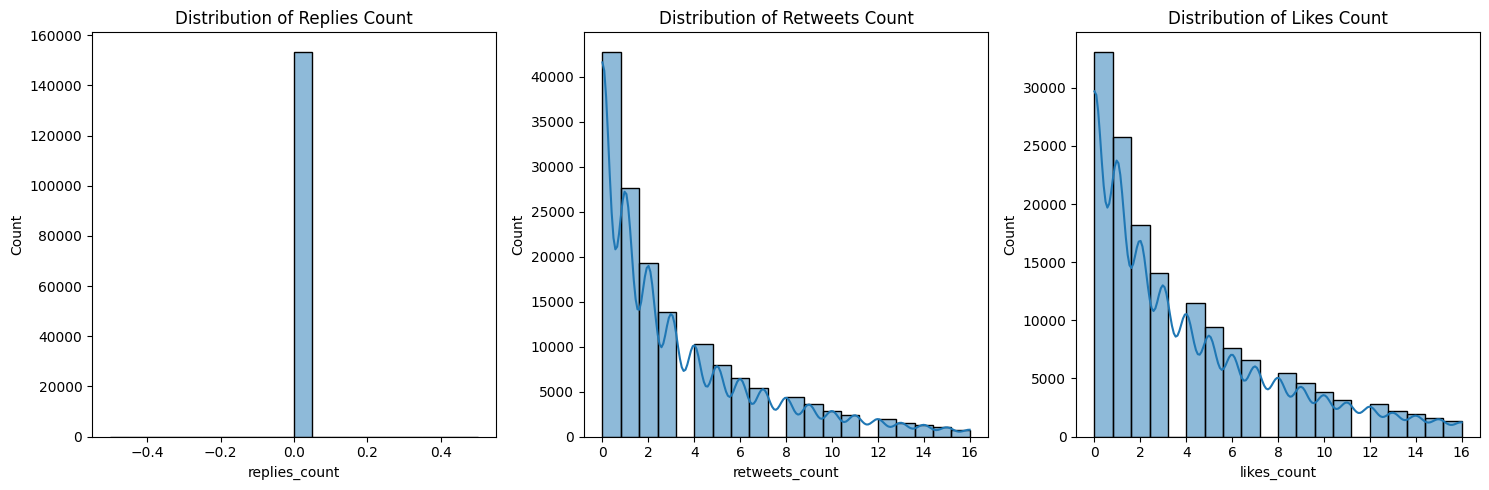

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each tweet
df_en_processed['tweet_length'] = df_en_processed['tweet'].apply(len)

# Plot the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_en_processed['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# You can also visualize the distribution of engagement metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_en_processed['replies_count'], bins=20, kde=True)
plt.title('Distribution of Replies Count')

plt.subplot(1, 3, 2)
sns.histplot(df_en_processed['retweets_count'], bins=20, kde=True)
plt.title('Distribution of Retweets Count')

plt.subplot(1, 3, 3)
sns.histplot(df_en_processed['likes_count'], bins=20, kde=True)
plt.title('Distribution of Likes Count')

plt.tight_layout()
plt.show()

In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm  # For progress bar

# Download VADER lexicon if you haven't already
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except nltk.downloader.DownloadError:
    nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment category
def get_sentiment(tweet):
    vs = analyzer.polarity_scores(tweet)
    if vs['compound'] >= 0.05:
        return 'positive'
    elif vs['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis to each tweet
tqdm.pandas()  # For better progress tracking
df_en_processed['sentiment'] = df_en_processed['tweet'].progress_apply(get_sentiment)

# Display the sentiment distribution
print("\nSentiment distribution:")
print(df_en_processed['sentiment'].value_counts())

# Display a few tweets with their assigned sentiment
print("\nSample tweets with sentiment:")
print(df_en_processed[['tweet', 'sentiment']].head())

  0%|          | 0/153449 [00:00<?, ?it/s]


Sentiment distribution:
sentiment
positive    75493
neutral     65192
negative    12764
Name: count, dtype: int64

Sample tweets with sentiment:
                                               tweet sentiment
3  .@Stephenson_Data shares four steps that will ...  positive
4  "Curricula is inherently brittle in a world wh...  positive
6  @LinkLabsInc @IoTchannel Wow! Wonderful!! Cong...  positive
8  What is #ModelOps vs. #MLOps? “ModelOps is key...   neutral
9  Demystifying #AI with 10 top applications:  ht...  positive


C:\Users\aakan\AppData\Local\Temp\ipykernel_6120\1146831925.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en_processed['sentiment'] = df_en_processed['tweet'].progress_apply(get_sentiment)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Separate features (tweets) and target (sentiment)
X = df_en_processed['tweet']
y = df_en_processed['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
logistic_regression_model = LogisticRegression(solver='liblinear', multi_class='auto', random_state=42)
logistic_regression_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

C:\Users\aakan\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Logistic Regression model: 0.8907

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.48      0.62      2553
     neutral       0.86      0.95      0.90     13038
    positive       0.92      0.91      0.92     15099

    accuracy                           0.89     30690
   macro avg       0.89      0.78      0.81     30690
weighted avg       0.89      0.89      0.89     30690



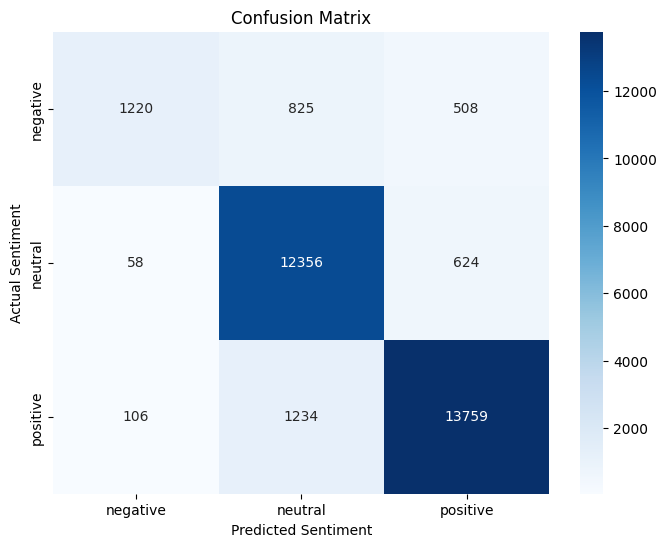

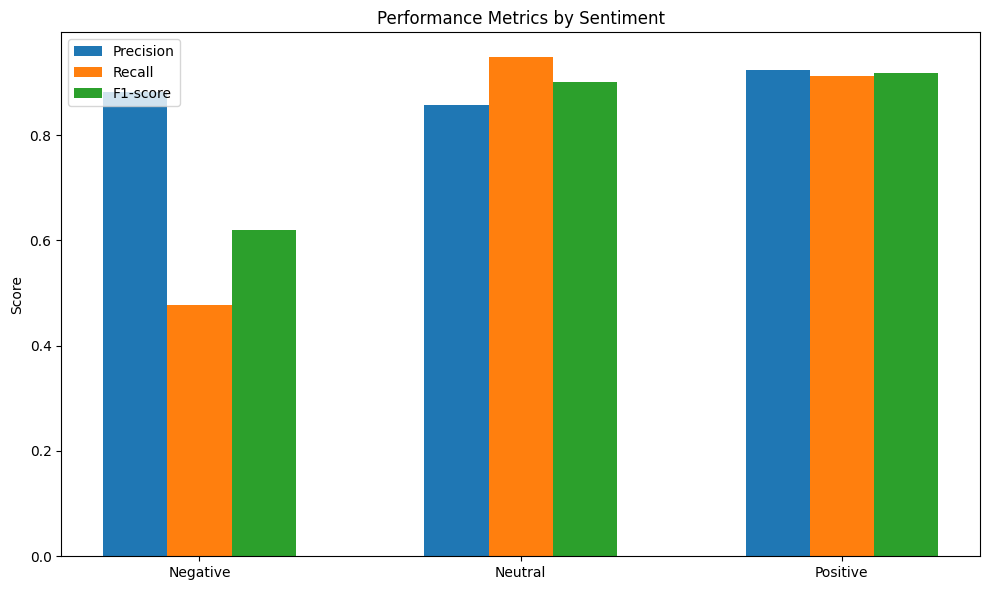

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=logistic_regression_model.classes_,
            yticklabels=logistic_regression_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

# Get the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics for visualization
precision = [report['negative']['precision'], report['neutral']['precision'], report['positive']['precision']]
recall = [report['negative']['recall'], report['neutral']['recall'], report['positive']['recall']]
f1_score = [report['negative']['f1-score'], report['neutral']['f1-score'], report['positive']['f1-score']]
labels = ['Negative', 'Neutral', 'Positive']

# Plotting precision, recall, and F1-score
x = range(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar([i - width for i in x], precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar([i + width for i in x], f1_score, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()